# **Exploring data**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load dataset
dataset = pd.read_csv('mcdonalds.csv')

# Print column names and first few rows
print("Columns:", dataset.columns.tolist())
print("\nData\n")
print(dataset.head())


Columns: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']

Data

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [ ]:

# Segmentation variables: Extract first 5 columns for analysis
df = dataset.iloc[:, :5]

# Check for missing values and dataset info
print("Missing values per column:\n", df.isnull().sum())
df.info()


Missing values per column:
 yummy         0
convenient    0
spicy         0
fattening     0
greasy        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   yummy       1453 non-null   object
 1   convenient  1453 non-null   object
 2   spicy       1453 non-null   object
 3   fattening   1453 non-null   object
 4   greasy      1453 non-null   object
dtypes: object(5)
memory usage: 56.9+ KB


In [ ]:
# Convert "Yes"/"No" to 1/0
mapping = {"Yes": 1, "No": 0}
df = df.applymap(lambda x: mapping.get(x, x))

# Calculate and display means of numeric columns
means = df.mean().round(2)
print("Column Means:\n", means)

Column Means:
 yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
dtype: float64


<ipython-input-96-be79e6c28fbc>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: mapping.get(x, x))


In [ ]:
df.corr()

,yummy,convenient,spicy,fattening,greasy
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000


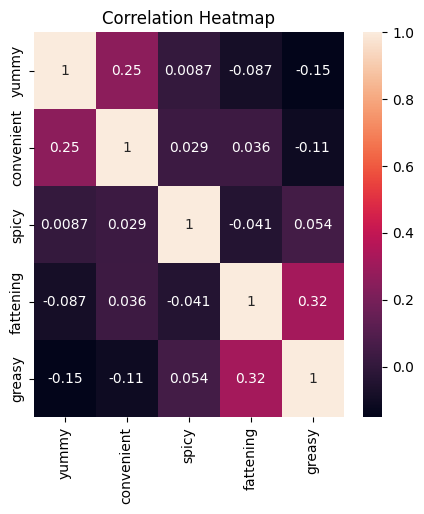

In [ ]:
# Correlation heatmap
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, )
plt.title('Correlation Heatmap')
plt.show()

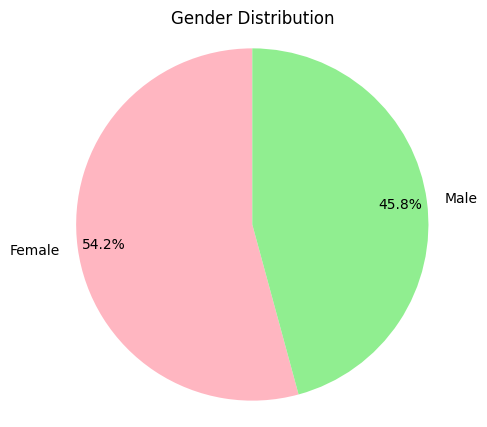

In [ ]:
# Gender distribution pie chart
gender_counts = dataset['Gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, colors=['lightpink', 'lightgreen'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

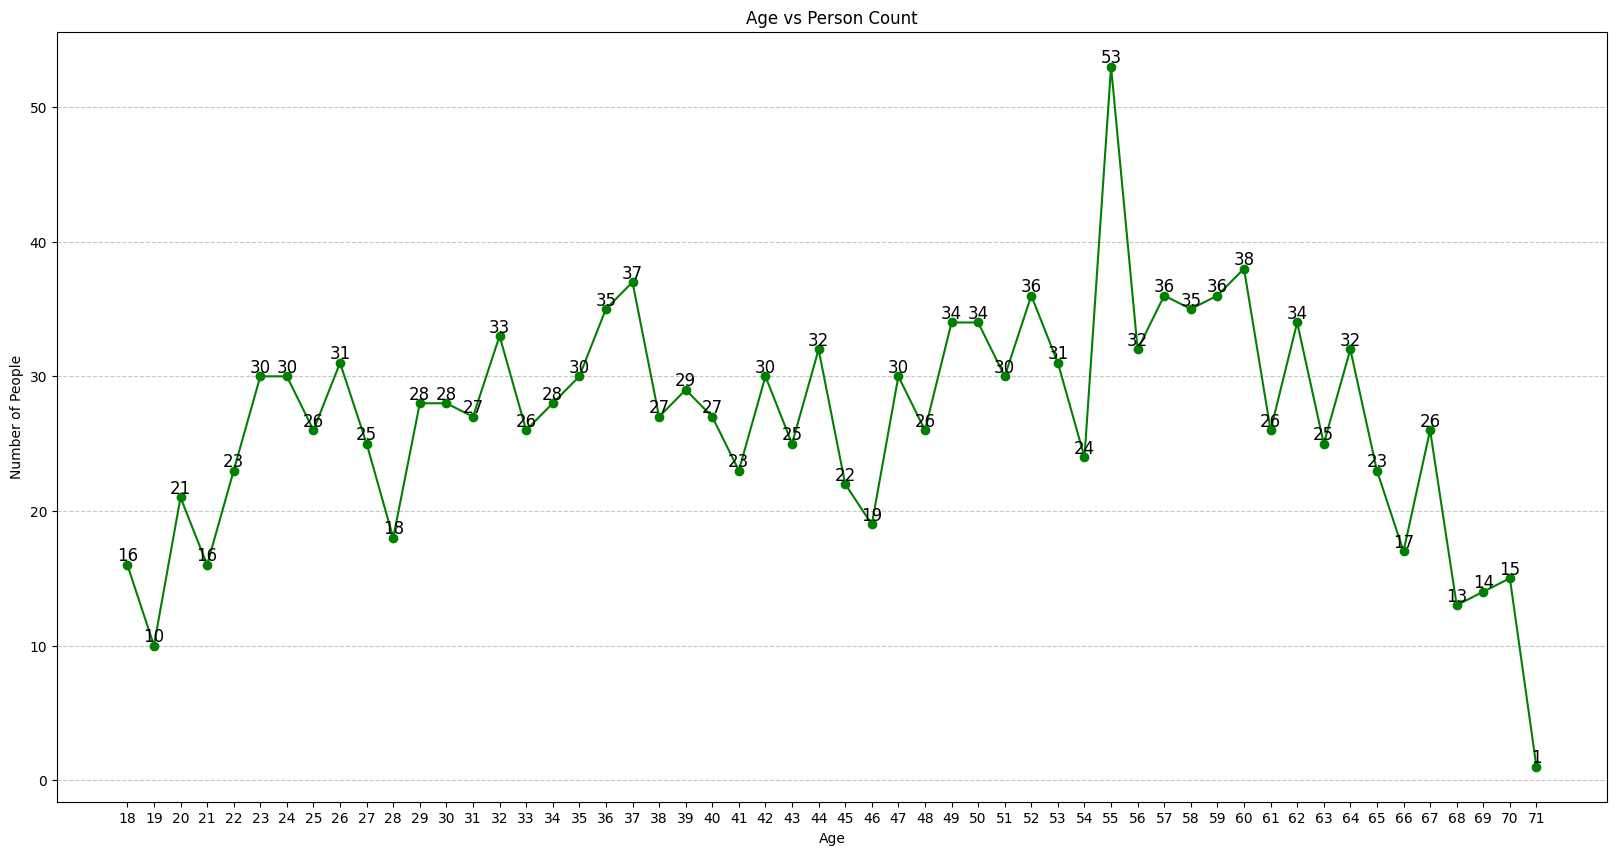

In [ ]:
# Age vs Person Count line graph with point labels
age_counts = dataset['Age'].value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.plot(age_counts.index, age_counts.values, color='green', marker='o')

# Adding labels (point values) to the markers
for x, y in zip(age_counts.index, age_counts.values):
    plt.text(x, y, str(y), fontsize=12, ha='center', va='bottom')  # Annotate each point

plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age vs Person Count')
plt.xticks(age_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Explained Variance Ratio: [0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]


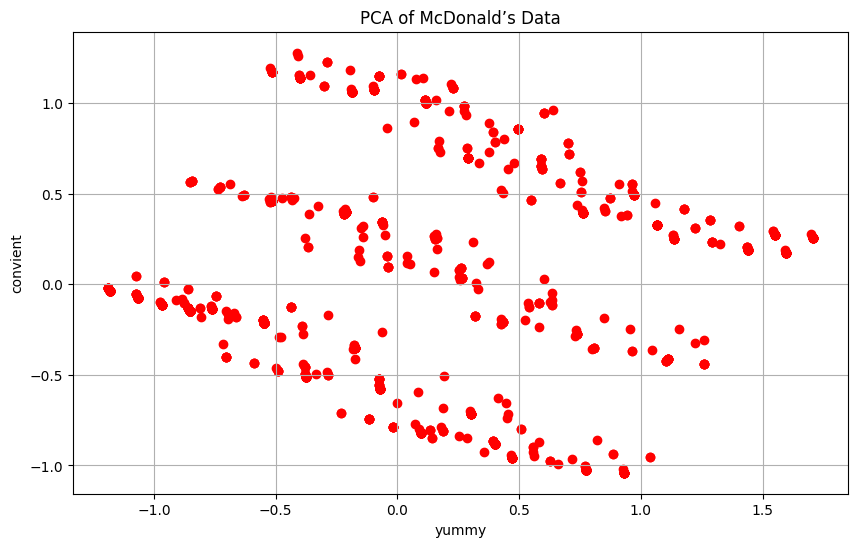

In [ ]:
# PCA Analysis
MD_x = (dataset.iloc[:, :11] == "Yes").astype(int)  # Convert first 11 columns to 1/0
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Explained variance
explained_variance = pca.explained_variance_ratio_.round(2)
print("Explained Variance Ratio:", explained_variance)

# PCA scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='red')
plt.title('PCA of McDonald’s Data')
plt.xlabel('yummy')
plt.ylabel('convient')
plt.grid()
plt.show()

Explained Variance Ratio: [0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]


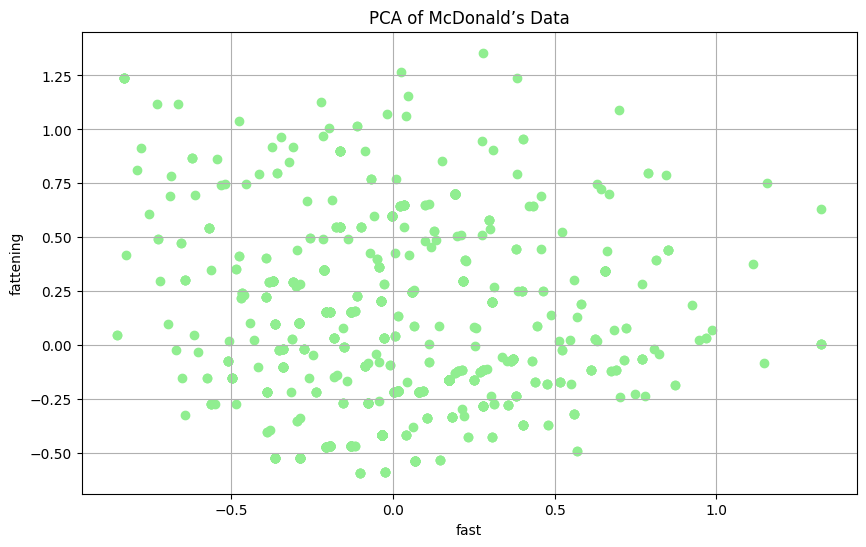

In [ ]:
# PCA Analysis
MD_x = (dataset.iloc[:, :11] == "Yes").astype(int)  # Convert first 11 columns to 1/0
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Explained variance
explained_variance = pca.explained_variance_ratio_.round(2)
print("Explained Variance Ratio:", explained_variance)

# PCA scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(MD_pca[:, 5], MD_pca[:, 3], color='lightgreen')
plt.title('PCA of McDonald’s Data')
plt.xlabel('fast')
plt.ylabel('fattening')
plt.grid()
plt.show()

# **Extracting Segments using K-means**

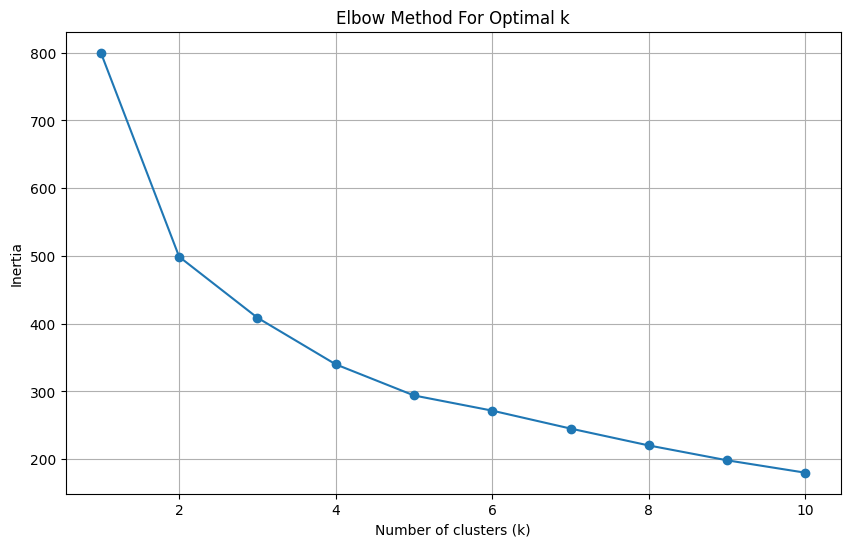

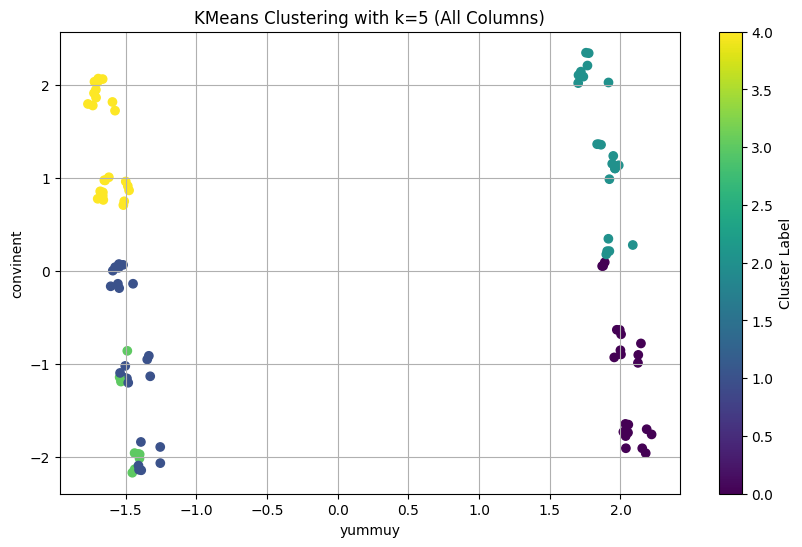

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Assume all columns in the dataset are relevant
# Extract all columns
MD_x = mcdonalds

# Identify categorical columns
categorical_cols = MD_x.select_dtypes(include=['object']).columns.tolist()

# Create a pipeline for preprocessing (One-hot encoding for categorical and scaling for all)
preprocessor = Pipeline(steps=[
    ('onehot', ColumnTransformer([('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')),
    ('scaler', StandardScaler())
])

# Fit and transform the data for all columns
MD_x_preprocessed = preprocessor.fit_transform(MD_x)

# Elbow method to find optimal k
inertia = [KMeans(n_clusters=k, random_state=1234).fit(MD_x_preprocessed).inertia_ for k in range(1, 11)]

# Plot Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# KMeans clustering with k=5 (as an example)
kmeans = KMeans(n_clusters=5, random_state=1234)
labels = kmeans.fit_predict(MD_x_preprocessed)

# PCA for 2D visualization (reduce to 2 principal components)
MD_x_pca = PCA(n_components=2).fit_transform(MD_x_preprocessed)

# Plot Clusters in 2D space
plt.figure(figsize=(10, 6))
plt.scatter(MD_x_pca[:, 0], MD_x_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering with k=5 (All Columns)')
plt.xlabel('yummuy')
plt.ylabel('convinent')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()


# **Extracting segments Using Mixtures of Distributions**


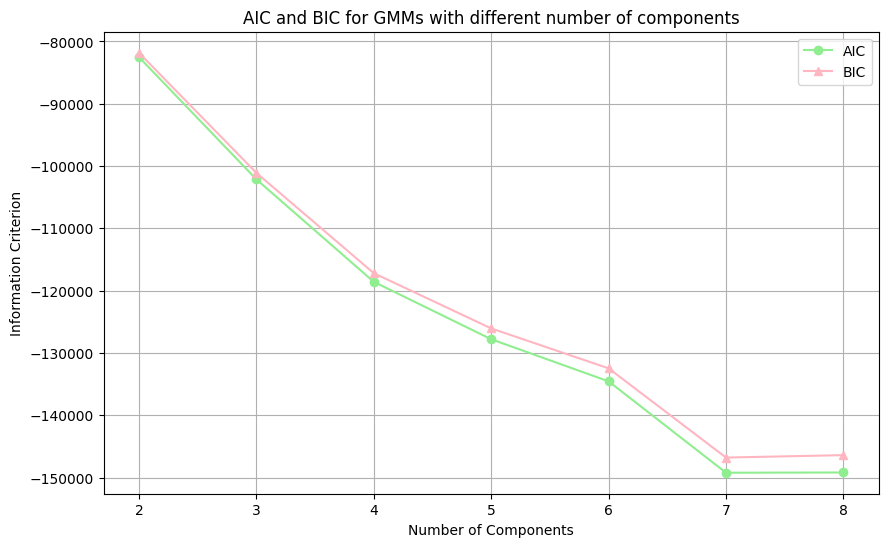

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Fit Gaussian Mixture Models from k = 2 to 8
n_components_range = range(2, 9)
models = {}
aic_values = []
bic_values = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(MD_x_scaled)

    aic_values.append(gmm.aic(MD_x_scaled))
    bic_values.append(gmm.bic(MD_x_scaled))
    models[n_components] = gmm

# Plot AIC and BIC values
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic_values, marker='o', label='AIC' ,color='lightgreen')
plt.plot(n_components_range, bic_values, marker='^', label='BIC', color='lightpink')
plt.title('AIC and BIC for GMMs with different number of components')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.legend()
plt.grid()
plt.show()

In [ ]:

# Select the model with k=4
MD_m4 = models[4]

# Get predicted clusters from KMeans (assuming MD.k4 is your KMeans model)
# For demonstration here, I'll assume you are using k=5 from KMeans already fitted
from sklearn.cluster import KMeans

# Perform KMeans clustering (example code for KMeans)
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x_scaled)

# Create a DataFrame to hold the cluster assignments
kmeans_df = pd.DataFrame({'KMeans_Cluster': kmeans_labels})

# Create a DataFrame with the GMM clusters
gmm_labels = MD_m4.predict(MD_x_scaled)
gmm_df = pd.DataFrame({'GMM_Cluster': gmm_labels})

# Combine the two DataFrames
combined_df = pd.concat([kmeans_df, gmm_df], axis=1)

# Generate a contingency table for KMeans vs GMM clusters
contingency_table = pd.crosstab(combined_df['KMeans_Cluster'], combined_df['GMM_Cluster'])
print(contingency_table)

# Get the log-likelihood for the GMM model
log_likelihood_m4 = MD_m4.score(MD_x_scaled) # This gives the average log-likelihood value
print("Log-Likelihood for GMM with k=4:", log_likelihood_m4)

GMM_Cluster       0    1    2    3
KMeans_Cluster                    
0                 0  464    0    0
1               581    0    0    0
2                71   33    3   23
3                 0    0  126    0
4                 0    0    5  147
Log-Likelihood for GMM with k=4: 40.98476847558895


# **Profiling Segments**


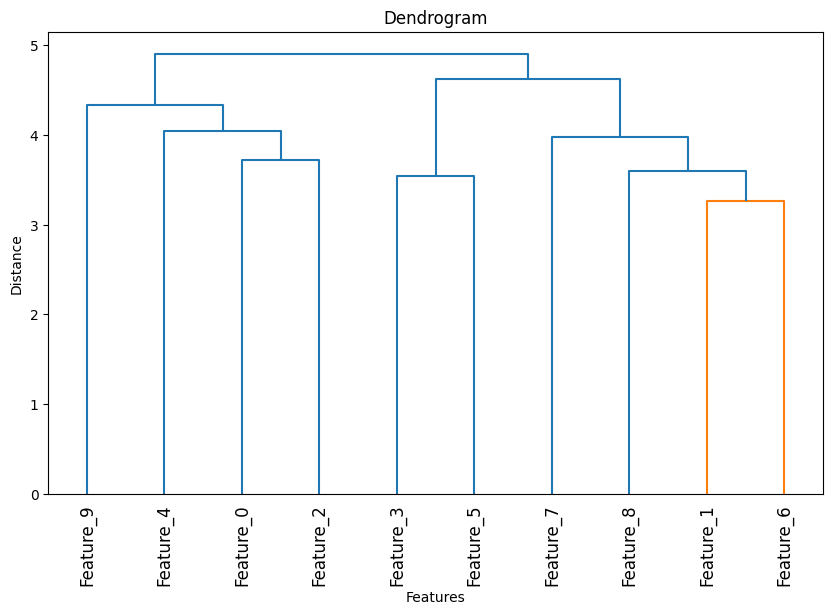

<ipython-input-84-152b4a9fea57>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


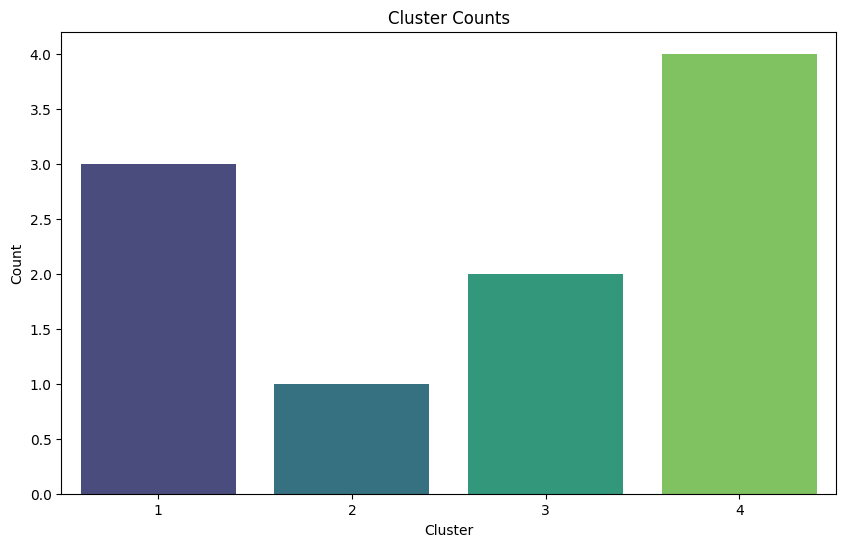

"\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=MD_k4, palette='viridis', s=100)\nplt.title('PCA Plot with Clusters')\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.legend(title='Cluster')\nplt.show()\n\n# Step 6: Project Axes on PCA plot\nfor i in range(len(MD_x.columns)):\n    plt.arrow(0, 0, MD_pca[i, 0] * 0.1, MD_pca[i, 1] * 0.1, \n              color='gray', alpha=0.5,\n              head_width=0.1, head_length=0.1)\n\nplt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis')\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.title('PCA Plot with Projected Axes')\nplt.grid()\nplt.show()\n"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA

# Step 1: Simulate some example data for MD.x
np.random.seed(0)  # For reproducibility
num_samples = 100
num_features = 10

# Create a random DataFrame (replace this with your actual data loading)
MD_x = pd.DataFrame(np.random.rand(num_samples, num_features),
                    columns=[f'Feature_{i}' for i in range(num_features)])

# Step 2: Perform hierarchical clustering
MD_x_transposed = MD_x.T  # Transpose the data
dist_matrix = pdist(MD_x_transposed)  # Calculate distance matrix
MD_vclust = linkage(dist_matrix, method='ward')  # Perform hierarchical clustering

# Step 3: Create cluster assignments using a method, e.g., fcluster
from scipy.cluster.hierarchy import fcluster

# Create clusters (for example, using 4 clusters)
MD_k4 = fcluster(MD_vclust, t=4, criterion='maxclust')

# Plot dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram(MD_vclust, labels=MD_x.columns, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

# Step 4: Create a bar chart of cluster sizes
cluster_counts = pd.Series(MD_k4).value_counts().sort_index()

# Plot bar chart of clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Step 5: Project PCA and plot the results
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)  # Perform PCA
'''
plt.figure(figsize=(10, 6))
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=MD_k4, palette='viridis', s=100)
plt.title('PCA Plot with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 6: Project Axes on PCA plot
for i in range(len(MD_x.columns)):
    plt.arrow(0, 0, MD_pca[i, 0] * 0.1, MD_pca[i, 1] * 0.1,
              color='gray', alpha=0.5,
              head_width=0.1, head_length=0.1)

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Projected Axes')
plt.grid()
plt.show()
'''

# **Selecting (the) Target Segment(s)**

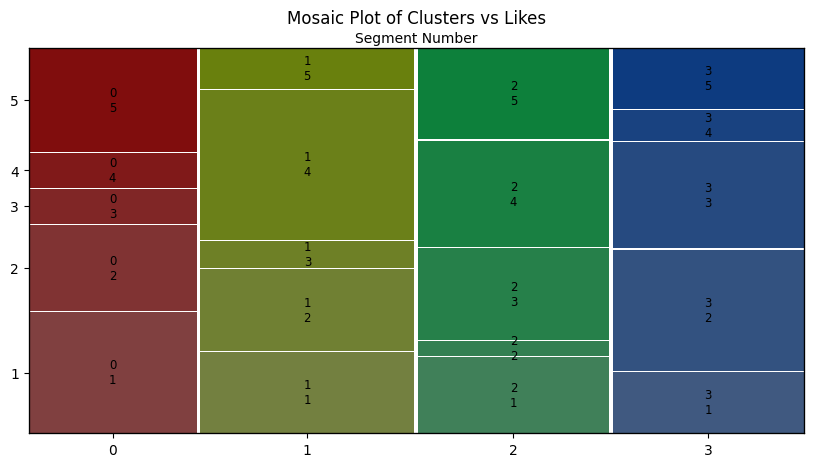

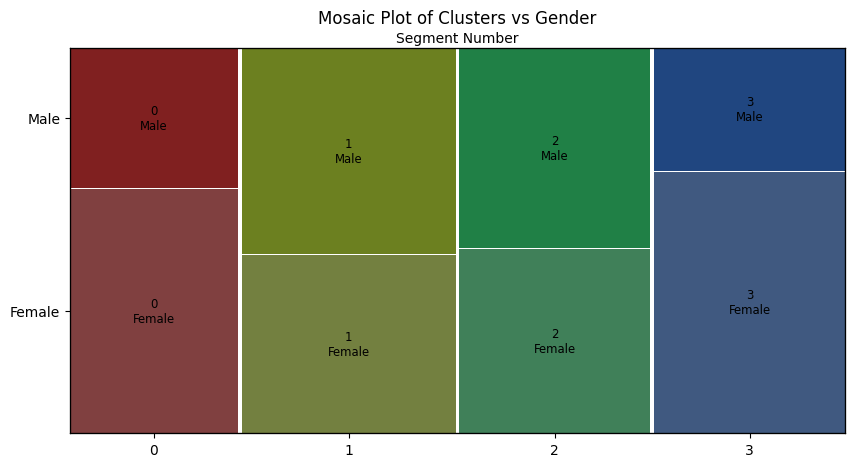

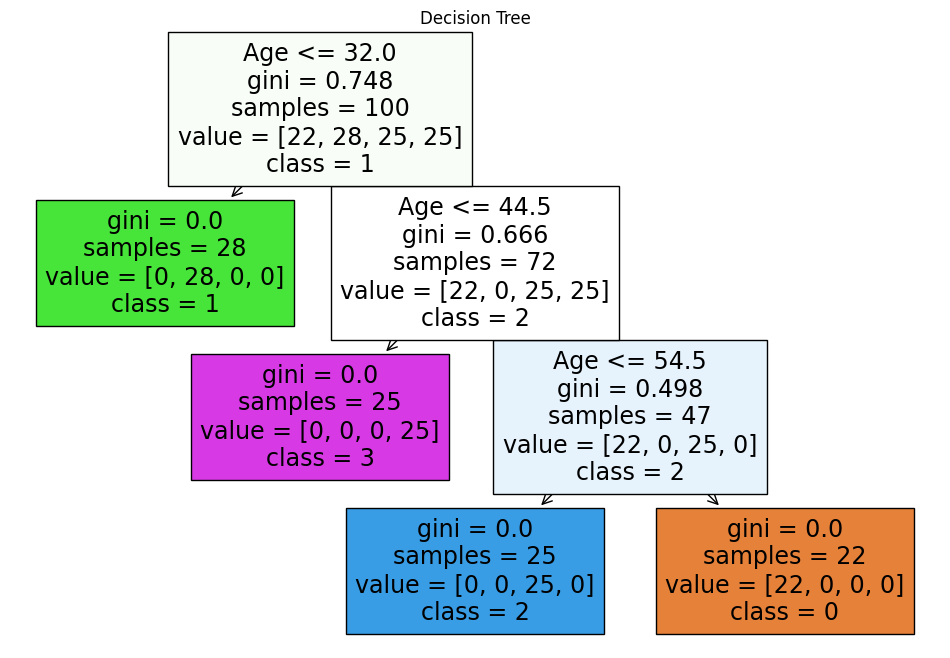

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic

# Step 1: Simulate example data for `mcdonalds`
np.random.seed(0)
num_samples = 100

# Simulate a dataset similar to `mcdonalds`
mcdonalds = pd.DataFrame({
    'Like': np.random.randint(1, 6, size=num_samples),  # Assuming 'Like' values between 1 to 5
    'Gender': np.random.choice(['Female', 'Male'], size=num_samples),
    'Age': np.random.randint(18, 65, size=num_samples),
    'VisitFrequency': np.random.randint(1, 10, size=num_samples),
})

# Create the 'Like.n' column for derived variable
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Step 2: Create clusters
kmeans = KMeans(n_clusters=4, random_state=0)
mcdonalds['k4'] = kmeans.fit_predict(mcdonalds[['Like.n', 'Age', 'VisitFrequency']])

# Step 3: Create contingency tables for mosaic plots
k4_crosstab_like = pd.crosstab(mcdonalds['k4'], mcdonalds['Like'])
k4_crosstab_gender = pd.crosstab(mcdonalds['k4'], mcdonalds['Gender'])

# Step 4: Mosaic plots
plt.figure(figsize=(10, 5))
mosaic(k4_crosstab_like.stack(), title='Mosaic Plot of Clusters vs Likes', ax=plt.gca())
plt.xlabel('Segment Number')
plt.ylabel('Like Count')
plt.show()

plt.figure(figsize=(10, 5))
mosaic(k4_crosstab_gender.stack(), title='Mosaic Plot of Clusters vs Gender', ax=plt.gca())
plt.xlabel('Segment Number')
plt.ylabel('Gender Count')
plt.show()

# Step 5: Prepare data for the decision tree
# Encode the categorical variables
label_encoder = LabelEncoder()
mcdonalds['Gender_encoded'] = label_encoder.fit_transform(mcdonalds['Gender'])

# Decision Tree Model
tree = DecisionTreeClassifier()
tree.fit(mcdonalds[['Like.n', 'Age', 'VisitFrequency', 'Gender_encoded']], mcdonalds['k4'])

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=['Like.n', 'Age', 'VisitFrequency', 'Gender_encoded'], class_names=['0', '1', '2', '3'], filled=True)
plt.title('Decision Tree')
plt.show()

# Step 6: Calculate visitation and likes means
visit = mcdonalds.groupby('k4')['VisitFrequency'].mean()
like = mcdonalds.groupby('k4')['Like.n'].mean()
female = mcdonalds.groupby('k4')['Gender'].apply(lambda x: (x == 'Female').mean())


